<a href="https://colab.research.google.com/github/rukshan99/twitter-sentiment-analysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting with Google Drive to get the data-set

In [1]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1x4XtAigTb-fJ2TQJOCDXzAkVOsToBrCT' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')  

## Normalization

In [3]:
# Regex package
import re

### Handle tweet features

In [4]:
# Example tweet
tweet = "RT @rukshaann I love this! 👍 https://rukshanjayasekara.me #Portfolio #Fun"

#### Retweet tag

In [5]:
# Handling the retweet(RT) tag
# It is not required for analysing sentiment
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [6]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @rukshaann I love this! 👍 https://rukshanjayasekara.me #Portfolio #Fun


#### User tags

In [7]:
# Handling user tags(@)
# It is not required for analysing sentiment
def replace_user(tweet, default_replace="user"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [8]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT user I love this! 👍 https://rukshanjayasekara.me #Portfolio #Fun


#### Emojis

Install and import `emoji` package

In [12]:
pip install emoji --upgrade

     |████████████████████████████████| 170 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=8d12b616387d7eb4450237de7fa9695a546cbdd13f73b3c4f10f2a00619301e1
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [13]:
import emoji

In [14]:
# Replace emojis with meaningful text
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [15]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @rukshaann I love this! :thumbs_up: https://rukshanjayasekara.me #Portfolio #Fun


#### URLs

In [16]:

def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [17]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @rukshaann I love this! 👍  #Portfolio #Fun


#### Hashtags

In [18]:
# Remove hashtag symbol(#)
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [19]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @rukshaann I love this! 👍 https://rukshanjayasekara.me Portfolio Fun


### Handle word features

In [20]:
# Example tweet
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

#### Capitals

In [21]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [22]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


#### Word repitions

In [23]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [24]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


#### Punctuation repetition

In [25]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [26]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


#### Word contraction

Install and import the `contraction` package

In [27]:
pip install contractions

     |████████████████████████████████| 321 kB 5.7 MB/s 
     |████████████████████████████████| 284 kB 46.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=f3eeada9cddea4e29aeab25826c3bf37e2323536296a98f0a8dceffe3d2208eb
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [28]:
import contractions

In [29]:
# Replace contractions with their extended forms
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [30]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


### Tokenization

Install and import the `NLTK` package

In [31]:
pip install nltk

In [32]:
import nltk

In [33]:
# Import the word_tokenize module from NLTK
from nltk.tokenize import word_tokenize
# Download the Punkt tokenizer model from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
# Example tweet
tweet = "These are 5 different words!"

In [35]:
# Returns a tweet as a list of tokens
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [36]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


#### Stopwords

In [37]:
# Import the string package
import string
# Import the stopwords module from NLTK
from nltk.corpus import stopwords
# Download stopwords data from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
# Create a list of English stopwords
stop_words = set(stopwords.words('english'))
# Remove useful stopwords for sentiment analysis
stop_words.discard('not')

In [39]:
print(stop_words)

{'a', 'her', 't', 'is', 'under', 'me', 'his', 'too', 'all', 'our', "you've", 'why', 'than', 'over', 'can', 'or', 'm', 'here', 'some', 'such', 'hers', 'the', 'more', 'mightn', 'but', 'wasn', "should've", 'on', 'y', 'by', 'wouldn', 'having', 'any', 'didn', "you'll", 'my', 'ourselves', 'other', 'who', 'which', 'off', 'be', 'myself', 'had', 'them', 'yourself', 'am', 'needn', 'and', 'for', 'to', 'there', 'through', 'shouldn', 'where', 'isn', 'just', "wasn't", "mustn't", 'down', 'are', 'whom', 'been', 'both', 'will', 'mustn', 'how', 'these', 'll', 'once', 'out', 'herself', 'nor', 's', 'does', 'have', 've', "isn't", 'this', "it's", "doesn't", 'itself', 'do', 'each', 'doesn', 'an', 'ours', "needn't", 'after', "won't", 'only', 'its', 'as', 'being', 'if', 'no', 'few', 'in', 'you', 'your', "mightn't", 'during', 'before', 'below', 'was', "she's", "hadn't", "that'll", "wouldn't", "you'd", 'about', 'ain', 'what', 'yours', 'from', "shouldn't", 'did', 'between', 'o', "don't", 'above', 'themselves', 'h

Update the `tokenize()` function to handle stopwords, punctuations, alphanumerics etc.

In [40]:
def tokenize(tweet,
             keep_punct = False,
             keep_alnum = False,
             keep_stop = False):
  
  tokens = word_tokenize(tweet)

  if not keep_punct:
    tokens = [token for token in tokens
                  if token not in string.punctuation]

  if not keep_alnum:
    tokens = [token for token in tokens if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    tokens = [token for token in tokens if not token in stop_words]
  return tokens

In [42]:
print("Tweet tokens: {}".format(tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(tokenize(tweet)))

Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['These', 'are', 'different', 'words']
Tweet tokens: ['These', 'different', 'words']


### Stemming

In [43]:
# Import different libraries and modules used for stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [44]:
# Example token list
tokens = ["manager", "management", "managing"]

In [45]:
# Defining different stemmers from NLTK package
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [46]:
# Returns a stemmed token list
# Should pass the stemmer a parameter
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [47]:
# PorterStemmer
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
# LancasterStemmer
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
# SnowballStemmer
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


Check over-stemming and under-stemming

In [48]:
tokens = ["international", "companies", "had", "interns"]

print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


### Lemmatization

In [49]:
# Import different libraries and modules used for lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [50]:
# Example token list
tokens = ["international", "companies", "had", "interns"]

In [51]:
# Part of Speech (POS) tagging
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

In [52]:
# Create the lemmatizer by using the WordNet module
lemmatizer = WordNetLemmatizer()

In [53]:
# Takes the list of tokens as input and returns a list of lemmatized tokens
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [54]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


### Final normalizing function

In [58]:
complex_tweet = r"""RT @rukshaann : hey looooook, 
THis is a big and complex TWeet!!! 👍 ... 
I'd be glad if you couldn't normalize it! 
Check https://rukshanjayasekara.me and LET ME KNOW!!! #NLP #Fun"""

In [56]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [59]:
print(process_tweet(complex_tweet, verbose=False))

['hey', 'look', 'big', 'complex', 'tweet', 'i', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


## Vectorization

Install the `Scikit-Learn` package 

In [60]:
pip install -U scikit-learn

Import `pandas` and `numpy` packages

In [61]:
import pandas as pd
import numpy as np

In [62]:
# Read Dataframe imported from Google Drive under .csv format
df = pd.read_csv("tweet_data.csv")

In [63]:
# Apply process_tweet function created in [56] to the entire DataFrame
df["tokens"] = df["tweet_text"].apply(process_tweet)

# Convert sentiment: 1 for "positive" and 0 for "negative"
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bc, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[i, sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [ ]:
df.head(10)

In [65]:
# Convert DataFrame to two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [ ]:
print(X)
print(y)

### Term Frequency – Inverse Document Frequency (TF-IDF)

In [67]:
# Example corpus
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [68]:
# Import TfidfVectorizer from the Scikit-learn Library
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
# Used to build the TF-IDF vectorizer with the corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [70]:
# Fit the vectorizer on the corpus, and transform the corpus
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [71]:
# Get the vectorizer features (matrix columns)
ft = tf_vect.get_feature_names()

print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
# Print the matrix shape
print(tf_mtx.shape)

(6, 13)


Transform a new tweet by using the vectorizer

In [73]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

## Sentiment Analysis

#### Helper function
used to plot the confusion matrix for the different models

In [74]:
import matplotlib.pyplot as plt
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

#### Train/Test data split

In [ ]:
# Check x and y
print(X)
print(y)

In [76]:
# Import the train_test_split function from the Scikit-Learn package
from sklearn.model_selection import train_test_split

In [77]:
# Use the train_test_split() function to split arrays of X and y into training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

In [78]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


In [79]:
import random

# Print random tweets, just to verify everything goes as expected
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['great', 'news']
Sentiment: 1


#### Logistic Regression

In [80]:
# Import the LogisticRegression model from Scikit-Learn
from sklearn.linear_model import LogisticRegression

In [81]:
# Used to fit a Logistic Regression model on X and y training data
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

TF-IDF vectorizer

In [82]:
tf = fit_tfidf(X_train)

# Transform X_train and X_test data by using the vectorizer
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [83]:
# Fit the Logistic Regression model on training data by using the fit_lr function
model_lr_tf = fit_lr(X_train_tf, y_train)

#### Performance metrics

In [84]:
# Import the accuracy score and confusion matrix from Scikit-Learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [85]:
# Use the fitted model_lr_tf (TF-IDF) to predict X_test
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [87]:
# Print the model accuracy by comparing predictions and real sentiments
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.57%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

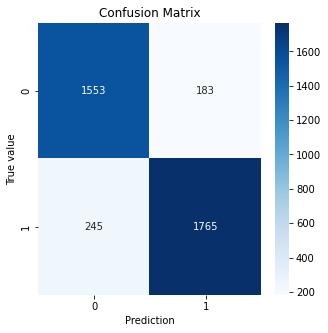

In [88]:
# Plot the confusion matrix by using the plot_confusion helper function
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## Final Pipeline

In [89]:
tweet = """RT @rukshaann: this is amazing NLP content! 
And don't forget to visit http://rukshanjayasekara.me ... Thank You!!! #Twitter #NLP #SentimentAnalysis"""

In [90]:
def predict_tweet(tweet):
  # Normalization
  processed_tweet = process_tweet(tweet)
  # Vectorization
  transformed_tweet = tf.transform([processed_tweet])
  # Sentiment analysis
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [91]:
predict_tweet(tweet)

'Prediction is positive sentiment'